### Time series forecasting with Data Based Model- Holt Winter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

### Step 1: Read the data

In [2]:
# we have to parse the date column in order to convert data from text format to date time format

In [3]:
df=pd.read_csv("Alcohol_Sales.csv",parse_dates=['DATE'],index_col=['DATE'])

In [4]:
df.rename(columns={"S4248SM144NCEN":'Sale'},inplace= True)

In [5]:
df.shape

(325, 1)

In [6]:
df.head(5)

,Sale
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [7]:
df.tail()

,Sale
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sale    325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


### Step 2 : Check for missing values

In [9]:
# counting the number of missing data points

sales_missing=df['Sale'].isnull().sum()
sales_missing

0

In [10]:
# there is no missing value in sales data

### Step 3: Checking for outerliers 

<Axes: xlabel='Sale'>

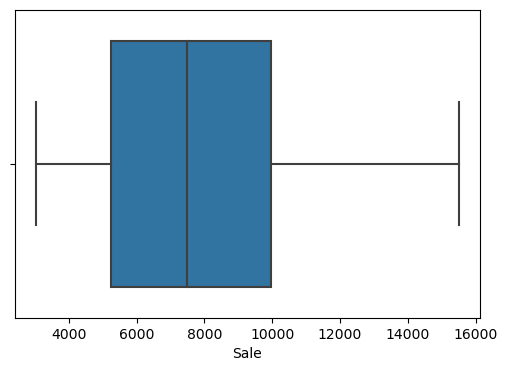

In [11]:
plt.figure(figsize=(6,4))
import seaborn as sns
sns.boxplot(x=df['Sale'])

There is no outliers as well

In [12]:
#ts=df['Sale'].resample('MS').sum()

<Axes: xlabel='DATE'>

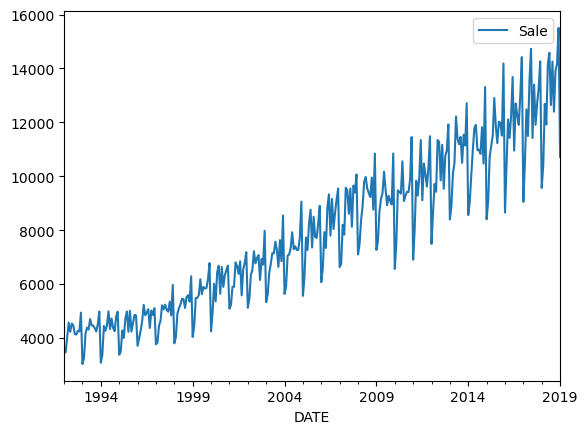

In [13]:
df.plot()

In [14]:
# we can see our time series some trend and seosanality as well

### Step 4: Check for stationary

In [15]:
# we have to make the time series statinary

# where properties (mean, variance and autocorrelatin) not change with respect to time

# we can make the series stationary by differentiating 

In [16]:
import statsmodels.api as sm

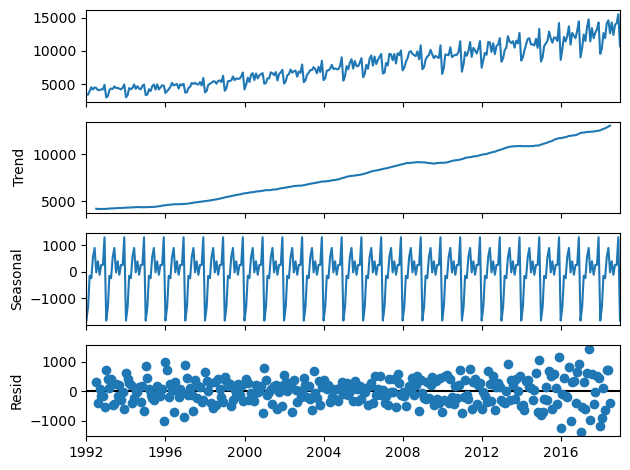

In [17]:
decomposition=sm.tsa.seasonal_decompose(df, model='additive')
fig=decomposition.plot()
plt.show()

In [18]:
# it is additive trend and multiplicative seasonality

In [19]:
# this is visual check -- if there would not be trend and seasonality then series would be stationary

In [20]:
# check the stationary with statistical test--> Dicky Fuller test

# in order to do forecasting series must be stationary

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
adftest=adfuller(df)

In [23]:
print('p-value for adfuller test is: ',adftest[1])

p-value for adfuller test is:  0.9987196267088919


In [24]:
# which is obvious greater than 0.05 and hence it is non stationary

from above analysis we can get to know the given time series dont have stationary data it has both trend and seasonality hence we will do data based forcasting with holt winter method

### Step 5: Train Test Split

In [26]:
len(df)

325

In [27]:
325*0.2

65.0

train-260
test 65

In [28]:
train=df[:260]
test=df[260:]

In [29]:
train.shape

(260, 1)

In [30]:
test.shape

(65, 1)

### Step 6: Model Building

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

### Holt winter's Model

In [32]:
hwmodel=ExponentialSmoothing(train.Sale,trend='add',seasonal='mul').fit()

C:\Users\milind.mali\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
test_pred=hwmodel.forecast(65)

In [48]:
test_pred

2013-09-01    10754.799524
2013-10-01    11368.879308
2013-11-01    11498.876865
2013-12-01    12954.408355
2014-01-01     8627.964508
                  ...     
2018-09-01    14117.942726
2018-10-01    14905.619009
2018-11-01    15057.606057
2018-12-01    16943.028987
2019-01-01    11270.924359
Freq: MS, Length: 65, dtype: float64

In [49]:
test.head(5)

,Sale
DATE,
2013-09-01,10494
2013-10-01,11540
2013-11-01,11138
2013-12-01,12709
2014-01-01,8557


<Axes: xlabel='DATE'>

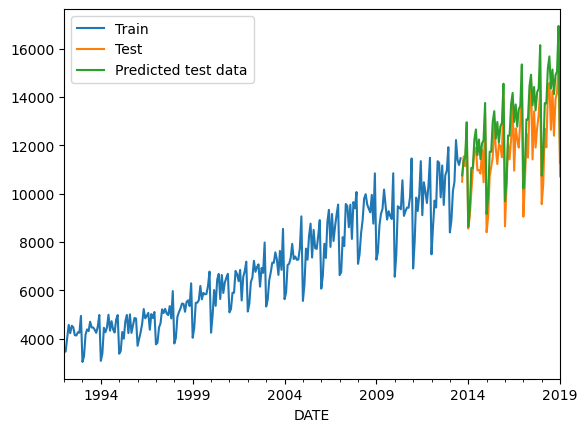

In [50]:
train['Sale'].plot(legend=True,label='Train')
test['Sale'].plot(legend=True, label="Test")

#we will also add the predicted value in the data
test_pred.plot(legend=True, label="Predicted test data")

In [51]:
# prediction for test data is perfectly aligning with test data
# is seem good because it capture trend and seasonality very well

### Step 7: Model Evaluation

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
np.sqrt(mean_squared_error(test,test_pred))

1064.5440912827357

In [54]:
df.Sale.mean(),np.sqrt(df.Sale.var())

(7886.4, 2914.2690611015687)

### Step 8: Final Model

In [56]:
final_model=ExponentialSmoothing(df.Sale,trend='add',seasonal='mul').fit()

C:\Users\milind.mali\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
final_pred=final_model.forecast(6)

In [58]:
final_pred

2019-02-01    11193.426533
2019-03-01    13209.106282
2019-04-01    13050.024391
2019-05-01    14504.262240
2019-06-01    15214.096433
2019-07-01    13462.584358
Freq: MS, dtype: float64

<Axes: xlabel='DATE'>

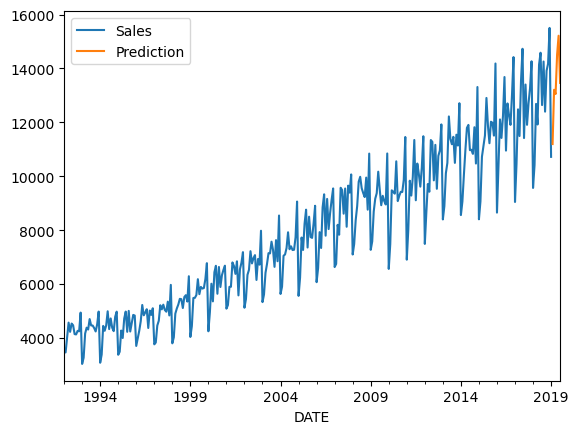

In [59]:
df['Sale'].plot(legend=True,label='Sales')
final_pred.plot(legend=True,label='Prediction')